# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1374 Колпачев Владислав. Вариант №9

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения


1\. Регрессионная модель: $\mathbb{E}_{\theta}(Y|z)=f_{\theta}(z)$, где $Y$ - наблюдения, а $z$ - ковариата

Линейная регрессионная модель: $\mathbb{E}_{\theta}(Y|z)=x(z)^\intercal\beta$, где $\beta$ - вектор параметров регрессии, a $x(z)$ - вектор регрессоров

Статистическая модель: $\mathbb{E}_{\theta}(Y|z)=X^\intercal\beta$, $Var(Y|z) = \sigma^2E$

2\. МНК

Альтернативная форма записи модели линейной регрессии: $Y = X^\intercal\beta + \varepsilon, \mathbb{E}_{\theta}\varepsilon = 0, Var_{\theta}\varepsilon = \sigma^2E$, где $\varepsilon$ - вектор ошибок

Метод наименьших квадратов: $RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to \min_\beta$

Нормальные уравнения: $XX^\intercal\beta=XY$

Решение системы нормальных уравнений в регулярном случае: $\hat{\beta}=(XX^\intercal)^{-1}XY$

3\. Оценка параметра $\sigma^2$

$S^2 =\frac{SS_e}{n-r} =\frac{RSS(\hat{\beta})}{n-r}$, где $r = rank X$

4\. Линейная функция параметра

$\psi(\beta) = C^\intercal\beta$

$\psi(\beta)$ допускает несмещенное оценивание, если $\exists L(Y) = B Y : \forall \beta : \mathbb{E}_\beta L(Y) = C^\intercal\beta$, где $C$ - матрица $m \times q$, $q$ - длина функции параметра

5\. Теорема Гаусса-Маркова

В модели линейной регрессии каждая ДНО-функция параметра $\psi(\beta) = C^\intercal\beta$, $C = (c_1, \dots, c_m)^\intercal$ имеет НРМД - оценку $\hat{\psi}$. Эта оценка единственна в классе линейных несмещенных оценоки и равна $\hat{\psi} = \sum_{i = 1}^{m}c_i\hat{\beta}_i$, где \hat{\beta} - произвольное решение системы нормальных уравнений.

6\. Предположения

Классическое предположение: $ Y \sim \mathcal{N}(X^\intercal\beta,\sigma^2E) $

Эквивалентное предположение об остатках:  $ \varepsilon \sim \mathcal{N}(0,\sigma^2E) $

7\. Доверительный интервал

ДНО - функция: $\psi(\beta) = C^\intercal\beta$

МНК оценка: $\hat{\psi}= C^\intercal\hat{\beta}$

$b_\psi = C^\intercal(XX^\intercal)^{-1}C$

Распределение: $\hat{\psi} \sim \mathcal{N}(\psi,\sigma^2b_\psi) $

Тогда $\frac{\hat{\psi} - {\psi}}{S\sqrt{b_\psi}} \sim S_{n-r}$

Доверительный интервал: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$, где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

8\. Доверительный эллипсоид

$b_\psi = C^\intercal(XX^\intercal)^{-1}C$

Распределение: $\frac{\left(\hat{\psi} - {\psi}\right)^\intercal {b_\psi}^{-1} \left(\hat{\psi} - {\psi}\right)}{qS^2} \sim \mathcal{F}_{q,n-r}$

Доверительный эллипсоид: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,где $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

9\. Проверка гипотез

Основная гипотеза $H_0:\psi=0$

Статистика: $\mathbb{F} = \frac{SS_H/q}{SS_e/(n-r)}$, где $SS_H = RSS(\hat{\beta}_H) - RSS(\hat{\beta})$, где $\hat{\beta}_H$ - МНК оценка при выполнении основной гипотезы

$\mathbb{F} \sim \mathcal{F}_{q,n-r}$

$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import sympy
from sympy.solvers.solveset import nonlinsolve
Y = [19.39, 8.76, 8.98, 27.71, 7.16, 6.50, 10.21, 5.15, 6.02, 19.25, 3.21, 13.97, 2.05, 3.84, 17.57, 7.07, 7.17,
     20.64, 7.83, 16.53, 26.36, 5.15, 10.63, 14.49, 12.92, 1.69, 8.32, 18.81, 9.09, 10.71, 26.66, 10.38, 1.13, 12.28,
     19.29, 19.34, 8.57, 12.92, 15.08, 3.81, 15.23, 1.40, 7.25, 4.73, 8.02, 0.20, 15.67, 22.88, 21.70, 13.35]
X = [0, 1, 0, 3, 0, 3, 3, 2, 1, 3, 3, 3, 0, 1, 2, 0, 2, 1, 3, 1, 1, 2, 2, 2, 2, 1,
     3, 2, 0, 2, 3, 3, 2, 1, 3, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1]
alpha = 0.1
h = 2.6

### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

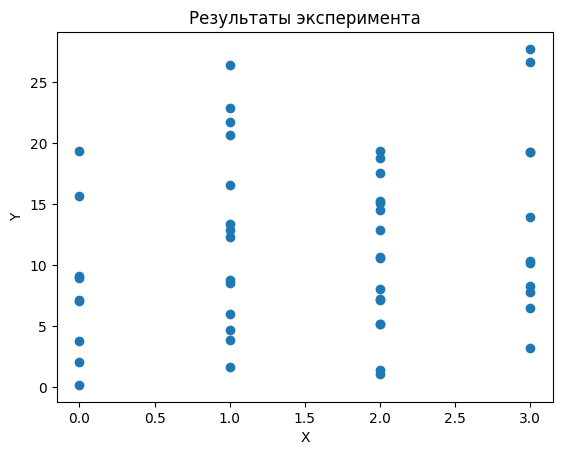

In [41]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Результаты эксперимента')
plt.show()

Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$

$Y = \beta_0 + \beta_1 X + \varepsilon$

Построение МНК оценок:

In [42]:
Y_matrix = np.matrix(Y).T
X_matrix = np.matrix([[1] * len(X), X])
print("Определитель матрицы X*X_transpose = ", np.linalg.det(X_matrix * X_matrix.T))
Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix
beta_0 = float(Beta_matrix[0])
beta_1 = float(Beta_matrix[1])
print(f"Оценка вектора бета: ({beta_0}, {beta_1})")

Определитель матрицы X*X_transpose =  2609.0000000000005
Оценка вектора бета: (9.46452663855883, 1.314476811038714)


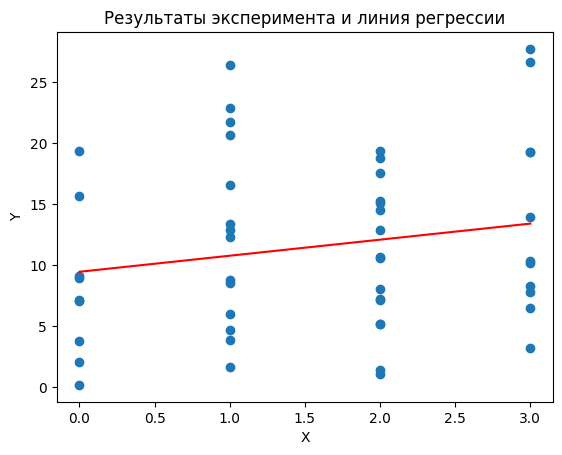

In [43]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.plot([0,3], [beta_0, beta_0 + beta_1 * 3], color = 'r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Результаты эксперимента и линия регрессии')
plt.show()

Очевидно, что модель линейной регрессии не подходит к заданным данным.

### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

In [44]:
unbias_var = np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2/(len(X) - np.linalg.matrix_rank(X_matrix))
print("Несмещённая оценка дисперсии =", unbias_var)

Несмещённая оценка дисперсии = 50.038567212852946


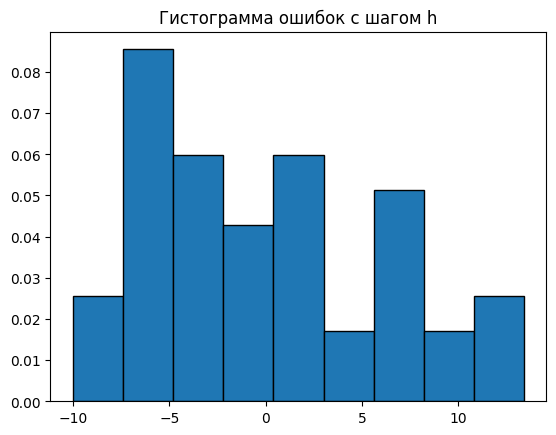

In [45]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
fig, ax = plt.subplots()
bins = [x / 10.0 for x in range(int(min(mistakes)) * 10, int(max(mistakes)) * 10 + 5, int(h * 10))]
ax.hist(mistakes, bins = bins, linewidth=1, edgecolor='black', density= True)
plt.title("Гистограмма ошибок с шагом h")
plt.show()

Пусть данная выборка $X_1, X_2, \dots, X_n$ - выборка из распределения с функцией распределения $F$.

Основная гипотеза: $H_0 : F \in \left\{\mathcal{N}(\theta) : \theta \in \Theta_0 \right\}$

Альтернативная гипотеза: $H_A : F \notin \left\{\mathcal{N}(\theta) : \theta \in \Theta_0 \right\}$

В качестве оценки неизвестного параметра $\theta$ возьмем: $\hat{\theta} = (0, S^2)$

Вычисление статистики критерия $\hat{\chi}^2$ c перегруппировкой выборки:


In [46]:
mean_mistakes = 0
std_mistakes = np.sqrt(unbias_var)

intervals = [[-10, -10+2*h], [-10+2*h, -10+3.5*h], [-10+3.5*h, -10+5.5*h], [-10+5.5*h, -10+7*h], [-10+7*h, -10+10*h]]
freq = [0] * len(intervals) #экспереметальные частоты
freq_teor = [0] * len(intervals) #Гипотетические частоты
print("x            | Частота | Гипотетическая частота")
for i in range(len(intervals)):
  a = intervals[i][0]
  b = intervals[i][-1]
  freq[i] += len([x for x in mistakes if (x >= a and x < b)])
  freq_teor[i] += len(mistakes) * (sps.norm.cdf(b, loc = mean_mistakes, scale = std_mistakes) - sps.norm.cdf(a, loc = mean_mistakes, scale = std_mistakes))
  if (i == len(intervals) - 1):
    freq_teor[i] += len(mistakes) * sps.norm.sf(b, loc = mean_mistakes, scale = std_mistakes)
    print('[', round(a, 1), ", +inf)\t", freq[i], "\t", freq_teor[i])
  else:
    print('[', round(a, 1), ',', round(b, 1), "]\t", freq[i], "\t", freq_teor[i])
freq = np.array(freq)
freq_teor = np.array(freq_teor)
chi_square = np.sum((freq - freq_teor) ** 2 / freq_teor)
print("Статистика хи-квадрат равна:", chi_square)
print("x_alpha равен:", sps.chi2.ppf(1 - alpha, df = len(freq) - 2))

x            | Частота | Гипотетическая частота
[ -10 , -4.8 ]	 13 	 8.498921977857457
[ -4.8 , -0.9 ]	 10 	 10.033552092314874
[ -0.9 , 4.3 ]	 10 	 13.949324987847053
[ 4.3 , 8.2 ]	 7 	 7.422435225463331
[ 8.2 , +inf)	 7 	 6.159283927360766
Статистика хи-квадрат равна: 3.640836041281749
x_alpha равен: 6.251388631170325


$\hat{\chi}^2 \approx 3.64$

$x_{\alpha} \approx 6.25$

$\hat{\chi}^2 < x_{\alpha_2}$ следовательно гипотеза о нормальности принимается

In [47]:
print("Статистика критерия Колмогорова Dn:", sps.kstest([element[0,0] for element in mistakes], "norm", args = (mean_mistakes,std_mistakes)).statistic)
print("x_alpha:", sps.kstwobign.ppf(1 - alpha) / np.sqrt(len(mistakes)))

Статистика критерия Колмогорова Dn: 0.09752985344223519
x_alpha: 0.17307822563424255


$D_n \approx 0.10$

$x_{\alpha} \approx 0.17$

$D_n < x_{\alpha_2}$ следовательно гипотеза о нормальности принимается

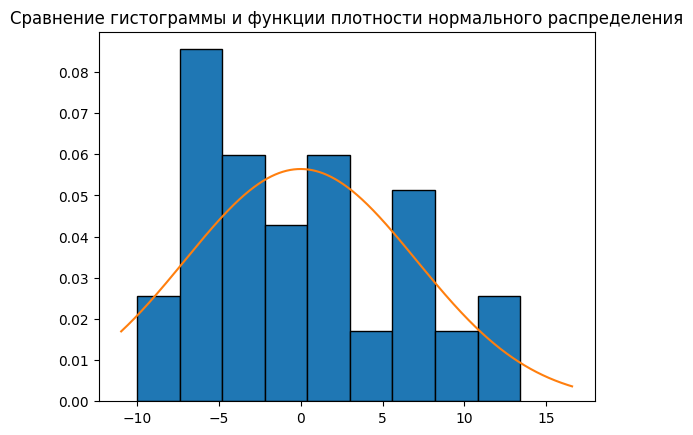

In [48]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
fig, ax = plt.subplots()
bins = [x / 10.0 for x in range(int(min(mistakes)) * 10, int(max(mistakes)) * 10 + 5, int(h * 10))]
ax.hist(mistakes, bins = bins, linewidth=1, edgecolor='black', density= True)
plt.plot(np.arange(min(mistakes), max(mistakes) + 1, 0.01), sps.norm.pdf(np.arange(min(mistakes), max(mistakes) + 1, 0.01), mean_mistakes, std_mistakes))
ax.set_title("Сравнение гистограммы и функции плотности нормального распределения")
plt.show()

Видно, что очертания нормальности присутсвуют, но однозначно сделать вывод о нормальности по визуальной оценке не представляется возможным.

### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

Доверительный интервал для параметра $\beta_0$:

ДНО-функция: $\psi = C^\intercal \beta = \beta_0$

Тогда $C = (1, 0)^\intercal$

Тогда МНК оценка равна $\hat{\psi} = \hat{\beta}_0$

Найдем доверительный интервал вида: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [49]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
x_alpha = sps.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[1], [0]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
print("x_alpha = ", x_alpha)
print("left = ", beta_0 - x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))
print("right = ", beta_0 + x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))

x_alpha =  1.6772241953450393
left =  6.374279981114464
right =  12.554773296003196


$\left[6.374, 12.555\right] \ni \beta_0$

Доверительный интервал для параметра $\beta_1$:

ДНО-функция: $\psi = C^\intercal \beta = \beta_1$

Тогда $C = (0, 1)^\intercal$

Тогда МНК оценка равна $\hat{\psi} = \hat{\beta}_1$

Найдем доверительный интервал вида: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [50]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
x_alpha = sps.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[0], [1]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
print("x_alpha = ", x_alpha)
print("left = ", beta_1 - x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))
print("right = ", beta_1 + x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))

x_alpha =  1.6772241953450393
left =  -0.3279707565828216
right =  2.9569243786602497


$\left[-0.328, 2.957\right] \ni \beta_1$

Доверительный эллипс для параметра $(\beta_0, \beta_1)$:

ДНО-функция: $\psi = C^\intercal \beta = (\beta_0, \beta_1)^\intercal$

Тогда $C = \begin{pmatrix}1 & 0 \\0 & 1\end{pmatrix}$

Тогда МНК оценка равна $\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1)^\intercal$

Найдем доверительный эллипс вида: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,

где $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [51]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
q = len(Beta_matrix)
x_alpha = sps.f.ppf(1 - alpha, dfn = q, dfd = n - r)
C = np.matrix([[1, 0], [0, 1]])
b_psi = C.T * np.linalg.inv(X_matrix * X_matrix.T) * C
print("Определитель матрицы b_psi = ", np.linalg.det(b_psi))
print("x_alpha = ", x_alpha)

x_symbol = sympy.Symbol('x', real=True)
y_symbol = sympy.Symbol('y', real=True)
x_vec = np.matrix([[x_symbol], [y_symbol]])
expr = (x_vec - Beta_matrix).T * np.linalg.inv(b_psi) * (x_vec - Beta_matrix)
print(f"Неравенство имеет вид: {expr[0,0].as_poly().as_expr()} <= {q * unbias_var * x_alpha}")
expr = expr[0,0].as_poly().as_expr() - q * unbias_var * x_alpha
print(f"Перенесем все в левую часть: {expr} <= 0")
angle = np.arctan(float(expr.as_poly().coeff_monomial(x_symbol*y_symbol)
      /(expr.as_poly().coeff_monomial(x_symbol**2) - expr.as_poly().coeff_monomial(y_symbol**2)))) / 2
print(f"Выполним поворот декартовой системы координат на угол {angle}")
x_2_symbol = sympy.Symbol("x'", real=True)
y_2_symbol = sympy.Symbol("y'", real=True)
expr = expr.subs([(x_symbol, x_2_symbol * np.cos(angle) - y_2_symbol * np.sin(angle)), (y_symbol, x_2_symbol * np.sin(angle) + y_2_symbol * np.cos(angle))])
expr = expr.as_poly().as_expr()
small_numbers = set([e for e in expr.atoms(sympy.Number) if abs(e) < 1e-05])
d = {s: 0 for s in small_numbers}
expr = expr.subs(d)
print(f"Полученное неравенство: {expr} <= 0")
A = expr.as_poly().coeff_monomial(x_2_symbol**2)
B = expr.as_poly().coeff_monomial(x_2_symbol)
C = expr.as_poly().coeff_monomial(y_2_symbol**2)
D = expr.as_poly().coeff_monomial(y_2_symbol)
E = expr.as_poly().coeff_monomial(1)
F = E - B**2/A/4 - D**2/C/4
x_3_symbol = sympy.Symbol("x''", real=True)
y_3_symbol = sympy.Symbol("y''", real=True)
expr = A * x_3_symbol**2 + C * y_3_symbol**2 + F
print(f"Неравенство после параллельного сдвига: {expr} <= 0")
expr = expr / (-F) + 1
print(f"Итоговый вид неравенства: {expr} <= 1")
A = expr.as_poly().coeff_monomial(x_3_symbol**2)
C = expr.as_poly().coeff_monomial(y_3_symbol**2)
print(f"Длины полуосей: {np.sqrt(float(1/A))} и {np.sqrt(float(1/C))}")

Определитель матрицы b_psi =  0.0003832886163280953
x_alpha =  2.4166601100530283
Неравенство имеет вид: 50.0*x**2 + 158.0*x*y - 1154.14*x + 177.0*y**2 - 1960.72*y + 6750.35487378305 <= 241.85241869501812
Перенесем все в левую часть: 50.0*x**2 + 158.0*x*y - 1154.14*x + 177.0*y**2 - 1960.72*y + 6508.50245508804 <= 0
Выполним поворот декартовой системы координат на угол -0.44687207030641557
Полученное неравенство: 12.1429578174264*x'**2 - 193.488165703457*x' + 214.857042182574*y'**2 - 2266.94163747828*y' + 6508.50245508804 <= 0
Неравенство после параллельного сдвига: 12.1429578174264*x''**2 + 214.857042182574*y''**2 - 241.852418695019 <= 0
Итоговый вид неравенства: 0.0502081305737899*x''**2 + 0.888380787514525*y''**2 <= 1
Длины полуосей: 4.462857031164075 и 1.0609634459290347


### 4. Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости.

Основная гипотеза: $H_0 : \psi = 0$

In [52]:
beta_0_h = sum(Y)/len(Y)
beta_1_h = 0
print(f"Оценка вектора бета при выполнении основной гипотезы: ({beta_0_h}, {beta_1_h})")
Beta_h_matrix = np.matrix([[beta_0_h], [beta_1_h]])
F_stat = (np.linalg.norm(Y_matrix - X_matrix.T * Beta_h_matrix)**2 - np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2)/2/unbias_var
print(f"Статистика F = {F_stat}")
print(f"x_alpha = {sps.f.ppf(1 - alpha, dfn = 2, dfd = n - r)}")

Оценка вектора бета при выполнении основной гипотезы: (11.541400000000001, 0)
Статистика F = 0.9008968562143356
x_alpha = 2.4166601100530283


$\mathbb{F} \approx 0.90$

$x_{\alpha} \approx 2.42$

$\mathbb{F} < x_{\alpha_2}$ следовательно гипотеза о независимости принимается

### 5.  Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$

$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \varepsilon$

Построение МНК оценок:

In [53]:
Y_matrix = np.matrix(Y).T
X_matrix = np.matrix([[1] * len(X), X, [x**2 for x in X]])
print("Определитель матрицы X*X_transpose = ", np.linalg.det(X_matrix * X_matrix.T))
Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix
beta_0 = float(Beta_matrix[0])
beta_1 = float(Beta_matrix[1])
beta_2 = float(Beta_matrix[2])
print(f"Оценка вектора бета: ({beta_0}, {beta_1}, {beta_2})")

Определитель матрицы X*X_transpose =  124839.99999999965
Оценка вектора бета: (9.146711310477501, 2.069857097084257, -0.2473687920538321)


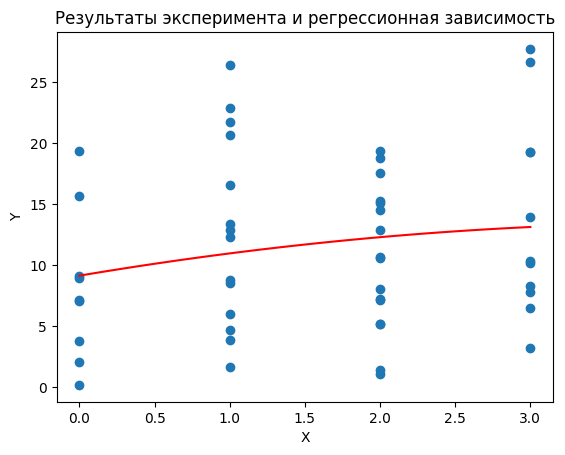

In [54]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
X_for_plot = [x / 10 for x in range(31)]
Y_for_plot = [beta_0 + beta_1 * x + beta_2 * x**2 for x in X_for_plot]
ax.plot(X_for_plot, Y_for_plot, color = 'r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Результаты эксперимента и регрессионная зависимость')
plt.show()

Коэффицент $\beta_2$ оказался мал и парабола очень приближена к прямой, которая совсем не отражает данные

### 6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

In [55]:
unbias_var = np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2/(len(X) - np.linalg.matrix_rank(X_matrix))
print("Несмещённая оценка дисперсии =", unbias_var)

Несмещённая оценка дисперсии = 51.04091993264571


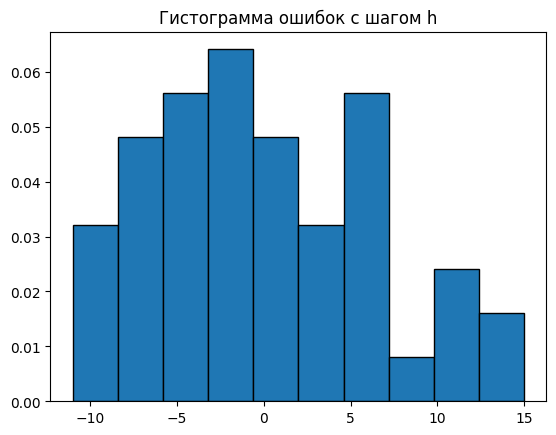

In [56]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
fig, ax = plt.subplots()
bins = [x / 10.0 for x in range(int(min(mistakes)) * 10, int(max(mistakes)) * 10 + 5, int(h * 10))]
ax.hist(mistakes, bins = bins, linewidth=1, edgecolor='black', density= True)
plt.title("Гистограмма ошибок с шагом h")
plt.show()

Пусть данная выборка $X_1, X_2, \dots, X_n$ - выборка из распределения с функцией распределения $F$.

Основная гипотеза: $H_0 : F \in \left\{\mathcal{N}(\theta) : \theta \in \Theta_0 \right\}$

Альтернативная гипотеза: $H_A : F \notin \left\{\mathcal{N}(\theta) : \theta \in \Theta_0 \right\}$

В качестве оценки неизвестного параметра $\theta$ возьмем: $\hat{\theta} = (0, S^2)$

Вычисление статистики критерия $\hat{\chi}^2$ c перегруппировкой выборки:

In [57]:
mean_mistakes = 0
std_mistakes = np.sqrt(unbias_var)

intervals = [[-10, -10+1.5*h], [-10+1.5*h, -10+3*h], [-10+3*h, -10+4.5*h], [-10+4.5*h, -10+7*h], [-10+7*h, -10+10*h]]
freq = [0] * len(intervals) #экспереметальные частоты
freq_teor = [0] * len(intervals) #Гипотетические частоты
print("x            | Частота | Гипотетическая частота")
for i in range(len(intervals)):
  a = intervals[i][0]
  b = intervals[i][-1]
  freq[i] += len([x for x in mistakes if (x >= a and x < b)])
  freq_teor[i] += len(mistakes) * (sps.norm.cdf(b, loc = mean_mistakes, scale = std_mistakes) - sps.norm.cdf(a, loc = mean_mistakes, scale = std_mistakes))
  if (i == len(intervals) - 1):
    freq_teor[i] += len(mistakes) * sps.norm.sf(b, loc = mean_mistakes, scale = std_mistakes)
    print('[', round(a, 1), ", +inf)\t", freq[i], "\t", freq_teor[i])
  else:
    print('[', round(a, 1), ',', round(b, 1), "]\t", freq[i], "\t", freq_teor[i])
freq = np.array(freq)
freq_teor = np.array(freq_teor)
chi_square = np.sum((freq - freq_teor) ** 2 / freq_teor)
print("Статистика хи-квадрат равна:", chi_square)
print("x_alpha равен:", sps.chi2.ppf(1 - alpha, df = len(freq) - 2))

x            | Частота | Гипотетическая частота
[ -10 , -6.1 ]	 9 	 5.790062549562594
[ -6.1 , -2.2 ]	 11 	 9.123233617565626
[ -2.2 , 1.7 ]	 9 	 10.7488095302241
[ 1.7 , 8.2 ]	 12 	 14.02135942463828
[ 8.2 , +inf)	 7 	 6.276595310335777
Статистика хи-квадрат равна: 2.8249319421527455
x_alpha равен: 6.251388631170325


$\chi^2 \approx 2.82$

$x_{\alpha} \approx 6.25$

$\chi^2 < x_{\alpha_2}$ следовательно гипотеза о нормальности принимается

In [58]:
print("Статистика критерия Колмогорова Dn:", sps.kstest([element[0,0] for element in mistakes], "norm", args = (mean_mistakes,std_mistakes)).statistic)
print("x_alpha:", sps.kstwobign.ppf(1 - alpha) / np.sqrt(len(mistakes)))

Статистика критерия Колмогорова Dn: 0.10789303511416604
x_alpha: 0.17307822563424255


$D_n \approx 0.11$

$x_{\alpha} \approx 0.17$

$D_n < x_{\alpha_2}$ следовательно гипотеза о нормальности принимается

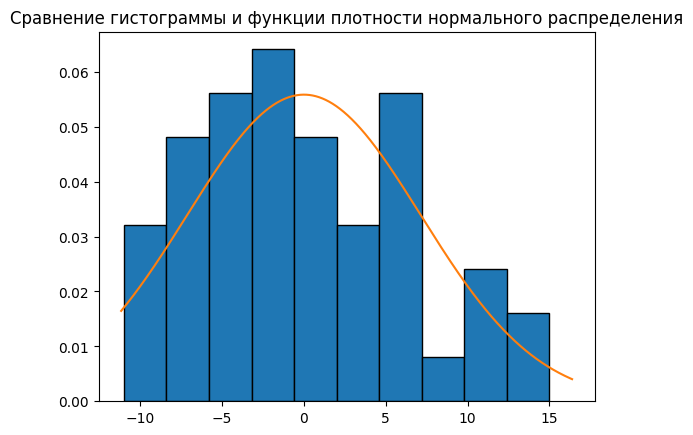

In [59]:
mistakes = Y_matrix - X_matrix.T * Beta_matrix
fig, ax = plt.subplots()
bins = [x / 10.0 for x in range(int(min(mistakes)) * 10, int(max(mistakes)) * 10 + 5, int(h * 10))]
ax.hist(mistakes, bins = bins, linewidth=1, edgecolor='black', density= True)
plt.plot(np.arange(min(mistakes), max(mistakes) + 1, 0.01), sps.norm.pdf(np.arange(min(mistakes), max(mistakes) + 1, 0.01), mean_mistakes, std_mistakes))
ax.set_title("Сравнение гистограммы и функции плотности нормального распределения")
plt.show()

Визуально видно нормальность ошибок, хотя местами и прослеживаются отклонения от нормального распределения

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0, \beta_1, \beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$

Доверительный интервал для параметра $\beta_0$:

ДНО-функция: $\psi = C^\intercal \beta = \beta_0$

Тогда $C = (1, 0, 0)^\intercal$

Тогда МНК оценка равна $\hat{\psi} = \hat{\beta}_0$

Найдем доверительный интервал вида: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [60]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
x_alpha = sps.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[1], [0], [0]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
print("x_alpha = ", x_alpha)
print("left = ", beta_0 - x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))
print("right = ", beta_0 + x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))

x_alpha =  1.67792672077558
left =  5.311822217959829
right =  12.981600402995173


$\left[5.312, 12.982\right] \ni \beta_0$

Доверительный интервал для параметра $\beta_1$:

ДНО-функция: $\psi = C^\intercal \beta = \beta_1$

Тогда $C = (0, 1, 0)^\intercal$

Тогда МНК оценка равна $\hat{\psi} = \hat{\beta}_1$

Найдем доверительный интервал вида: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [61]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
x_alpha = sps.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[0], [1], [0]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
print("x_alpha = ", x_alpha)
print("left = ", beta_1 - x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))
print("right = ", beta_1 + x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))

x_alpha =  1.67792672077558
left =  -3.4761664651309934
right =  7.615880659299507


$\left[-3.476, 7.616\right] \ni \beta_1$

Доверительный интервал для параметра $\beta_2$:

ДНО-функция: $\psi = C^\intercal \beta = \beta_2$

Тогда $C = (0, 0, 1)^\intercal$

Тогда МНК оценка равна $\hat{\psi} = \hat{\beta}_2$

Найдем доверительный интервал вида: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$,

где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [62]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
x_alpha = sps.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[0], [0], [1]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
print("x_alpha = ", x_alpha)
print("left = ", beta_2 - x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))
print("right = ", beta_2 + x_alpha * np.sqrt(unbias_var) * np.sqrt(b_psi))

x_alpha =  1.67792672077558
left =  -1.980344186185805
right =  1.4856066020781409


$\left[-1.981, 1.486\right] \ni \beta_2$

Доверительный эллипсоид для параметра $(\beta_0, \beta_1, \beta_2)$:

ДНО-функция: $\psi = C^\intercal \beta = (\beta_0, \beta_1, \beta_2)^\intercal$

Тогда $C = \begin{pmatrix}1 & 0 & 0\\0 & 1 &0 \\ 0&0&1 \end{pmatrix}$

Тогда МНК оценка равна $\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1,\hat{\beta}_2)^\intercal$

Найдем доверительный эллипсоид вида: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,

где $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [63]:
r = np.linalg.matrix_rank(X_matrix)
n = len(X)
q = len(Beta_matrix)
x_alpha = sps.f.ppf(1 - alpha, dfn = q, dfd = n - r)
C = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
b_psi = C.T * np.linalg.inv(X_matrix * X_matrix.T) * C
print("Определитель матрицы b_psi = ", np.linalg.det(b_psi))
print("x_alpha = ", x_alpha)

x_symbol = sympy.Symbol('x', real=True)
y_symbol = sympy.Symbol('y', real=True)
z_symbol = sympy.Symbol('z', real=True)
x_vec = np.matrix([[x_symbol], [y_symbol], [z_symbol]])
expr = (x_vec - Beta_matrix).T * np.linalg.inv(b_psi) * (x_vec - Beta_matrix)
print(f"Неравенство имеет вид: {expr[0,0].as_poly().as_expr()} <= {q * unbias_var * x_alpha}")
expr = expr[0,0].as_poly().as_expr() - q * unbias_var * x_alpha
print(f"Перенесем все в левую часть: {expr} <= 0")
x_2_symbol = sympy.Symbol("x'", real=True)
y_2_symbol = sympy.Symbol("y'", real=True)
z_2_symbol = sympy.Symbol("z'", real=True)
ev, _ = np.linalg.eig(np.linalg.inv(b_psi))
koef = ev / (x_alpha * q * unbias_var)
expr = koef[0]*x_2_symbol**2+koef[1]*y_2_symbol**2+koef[2]*z_2_symbol**2
print(f"Итоговый вид неравенства: {expr} <= 1")
print(f"Длины полуосей: {np.sqrt(1/koef[0])}, {np.sqrt(1/koef[1])} и {np.sqrt(1/koef[2])}")

Определитель матрицы b_psi =  8.010253123998798e-06
x_alpha =  2.2041823911022664
Неравенство имеет вид: 49.9999999999997*x**2 + 157.999999999999*x*y + 353.999999999997*x*z - 1154.14*x + 176.999999999999*y**2 + 877.999999999995*y*z - 1960.71999999999*y + 1160.99999999999*z**2 - 4480.87999999998*z + 6753.28286316568 <= 337.5104908235951
Перенесем все в левую часть: 49.9999999999997*x**2 + 157.999999999999*x*y + 353.999999999997*x*z - 1154.14*x + 176.999999999999*y**2 + 877.999999999995*y*z - 1960.71999999999*y + 1160.99999999999*z**2 - 4480.87999999998*z + 6415.77237234208 <= 0
Итоговый вид неравенства: 4.02073417348288*x'**2 + 0.0818658950080072*y'**2 + 0.00986469256879809*z'**2 <= 1
Длины полуосей: 0.4987091304538458, 3.4950105651355114 и 10.068348103487947


### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить её значимость на уровне $\alpha$.


Основная гипотеза: $H_0 : \psi = 0$

In [64]:
X_matrix_h = np.matrix([[1] * len(X), X])
Beta_h_matrix = np.linalg.inv(X_matrix_h * X_matrix_h.T) * X_matrix_h * Y_matrix
beta_0_h = float(Beta_h_matrix[0])
beta_1_h = float(Beta_h_matrix[1])
beta_2_h = 0
Beta_h_matrix = np.matrix([[beta_0_h], [beta_1_h], [beta_2_h]])
print(f"Оценка вектора бета при выполнении основной гипотезы: ({beta_0_h}, {beta_1_h}, {beta_2_h})")
F_stat = (np.linalg.norm(Y_matrix - X_matrix.T * Beta_h_matrix)**2 - np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2)/q/unbias_var
print(f"Статистика F = {F_stat}")
print(f"x_alpha = {sps.f.ppf(1 - alpha, dfn = q, dfd = n - r)}")

Оценка вектора бета при выполнении основной гипотезы: (9.46452663855883, 1.314476811038714, 0)
Статистика F = 0.019121843065375194
x_alpha = 2.2041823911022664


$\mathbb{F} \approx 0.02$

$x_{\alpha} \approx 2.20$

$\mathbb{F} < x_{\alpha_2}$ следовательно гипотеза о квадратичной регрессионной независимости принимается

## Выводы
В ходе выполнения практической работы были изучены основные положения метода наименьших квадратов (МНК), статистические свойства МНК-оценок, понятия функции регрессии и роль МНК в регрессионном анализе.

Сформированы навыки посторения МНК оценок, доверительных эллипсов и эллипсоидов, проверки гипотез о независимости и линейной регрессионной зависимости.

Были получены выводы о нормальности вектора ошибок и выводы о характере зависимости данных.